# **Predictive Analytics**

## **Objective:**   
Membangun model menggunakan Algoritma Regresi yang dapat memprediksi tingkat risiko mobil.

## **Sumber Dataset**
https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

# **Import Library**


#### Memuat library yang diperlukan untuk analisis data dan memuat dataset dari file CSV.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# **Dataset Loading**

#### Mengupload file kaggle.json untuk konfigurasi kredensial API kaggle.

In [3]:
# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dretham25","key":"ff100eb307b6b0ce727cf3e2da12f8c8"}'}

#### Mendownload dataset Car Evaluation Dataset dari kaggle menggunakan kaggle API command dan unzip file dataset yang di download.

In [4]:
# Download dataset menggunakan kaggle API command
!kaggle datasets download -d elikplim/car-evaluation-data-set
!unzip car-evaluation-data-set

Dataset URL: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set
License(s): CC0-1.0
  0% 0.00/4.66k [00:00<?, ?B/s]
100% 4.66k/4.66k [00:00<00:00, 9.11MB/s]
Archive:  car-evaluation-data-set.zip
  inflating: car_evaluation.csv      


#### Loading dataset menggunakan library pandas untuk membaca file dataset (format .csv).

In [5]:
# load dataset
car = pd.read_csv('car_evaluation.csv')
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# **Exploratory Data Analysis (EDA)**

#### Melakukan rename pada kolom fitur untuk mempermudah pemahaman pada dataset.

In [6]:
# Rename kolom
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

#### Menampilkan dataframe yang telah diganti nama kolomnya.

In [7]:
# Menampilkan dataframe yang telah diganti nama kolomnya
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#### Melakukan pengecekan informasi berupa kolom fitur beserta tipe data yang ada pada dataset.

In [8]:
# Cek informasi pada dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Melakukan pengecekan deskripsi statistik pada dataset.

In [9]:
# Cek deskripsi statistik dataset
car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


#### Mengeksplor variabel target pada dataset yang adalah variabel 'class'.

In [10]:
# Eksplorasi variabel 'class'
car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

#### Melakukan pengecekan missing value untuk mengetahui ada atau tidaknya nilai null pada dataset.

In [11]:
# Cek missing value
car.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

#### Melakukan analisis data untuk mengetahui banyak sampel data dalam masing-masing fitur pada dataset.

In [12]:
# Analisis data
cat_features = car.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  print(car[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


# **Data Preparation**

### **Train-Test Split**

Melakukan pembagian dataset menjadi data train dan data test dengan perbandingan 80% data train dan 20% data test.

In [13]:
# Import library train_test_split
from sklearn.model_selection import train_test_split

# Buat variabel X dan y
X = car.drop('class', axis=1)
y = car['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Menampilkan jumlah sampel data pada semua dataset dan yang telah dibagi menjadi data train dan data test
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1727
Total # of sample in train dataset: 1381
Total # of sample in test dataset: 346


### **Encoding Fitur Kategori**

#### Menginstall dan mengimpor sebuah library bernama category_encoders yang berfungsi untuk mengubah fitur kategorikal menjadi data numerik.

In [15]:
# Import kategori encoder
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


#### Melakukan encoding pada fitur-fitur kategorikal untuk diubah menjadi fitur numerik dengan Ordinal Encoding

In [16]:
# Encode fitur-fitur dengan ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

#### Melakukan pengecekan pada nilai X_train dan X_test yang telah melalui proses encode

In [17]:
# Mengecek nilai X_train yang telah dilakukan encoding
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [18]:
# Mengecek nilai X_test yang telah dilakukan encode
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


# **Model Development**

#### Menyiapkan dataframe untuk dilakukan analisis model dengan menggunakan 3 algoritma regresi yaitu:
- Linear Regression
- Decision Tree
- Random Forest

In [19]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'DecisionTree', 'RandomForest'])

## **Model Development dengan Linear Regression**

1. Model Development dimulai dengan mengimpor library yang dibutuhkan seperti LinearRegression, Mean Squared Error (MSE), dan Label Encoder.

2. Selanjutnya, membuat sebuah objek LabelEncoder bernama le yang berfungsi untuk mengubah nilai y_train (Variabel Target) menjadi numerik untuk memudahkan pelatihan pada model.

3. Kemudian, membuat sebuah model prediksi Linear Regression dan melatih model prediksi tersebut untuk melakukan prediksi risiko mobil yang didefinisikan dengan LR.

4. Terakhir, melakukan evaluasi pada model dalam melatih data train dengan mengkalkulasi Mean Squared Error (MSE) dalam data train.

In [20]:
# Impor library yang dibutuhkan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()

# Ubah nilai y_train menjadi numerik
y_train_encoded = le.fit_transform(y_train)

# Buat model prediksi
LR = LinearRegression()
LR.fit(X_train, y_train_encoded)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train_encoded)

## **Model Development dengan Decision Tree**

1. Model Development dimulai dengan mengimpor library yang dibutuhkan seperti DecisionTreeRegresor.  

3. Kemudian, membuat sebuah model prediksi Decision Tree dan melatih model prediksi tersebut untuk melakukan prediksi risiko mobil yang didefinisikan DT dengan input parameter sebagai berikut:
   
   - max_depth=16, parameter ini mengontrol kedalaman maksimum decision tree. Kedalaman maksimum disetel ke 16.
   - random_state=55, parameter ini memastikan reproduksibilitas dengan menyetel seed untuk generator nomor acak yang digunakan oleh algoritma decision tree.

4. Terakhir, melakukan evaluasi pada model dalam melatih data train dengan mengkalkulasi Mean Squared Error (MSE) dalam data train.

In [21]:
# Impor library yang dibutuhkan
from sklearn.tree import DecisionTreeRegressor

# Buat model prediksi
DT = DecisionTreeRegressor(max_depth=16, random_state=55)
DT.fit(X_train, y_train_encoded)

models.loc['train_mse','DecisionTree'] = mean_squared_error(y_pred=DT.predict(X_train), y_true=y_train_encoded)

## **Model Development dengan Random Forest**

1. Model Development dimulai dengan mengimpor library yang dibutuhkan seperti RandomForestRegressor.  

3. Kemudian, membuat sebuah model prediksi Random Forest dan melatih model prediksi tersebut untuk melakukan prediksi risiko mobil yang didefinisikan RF dengan input parameter sebagai berikut:
   - n_estimators=50, parameter ini menentukan jumlah pohon keputusan yang akan dibangun dalam Random Forest. Pada kasus ini, pohon keputusan dibuat sebanyak 50.
   - max_depth & random_state disetel sama seperti parameter pada Decision Tree yaitu max_depth=16 & random_state=55.
   - n_jobs=-1, parameter ini memberitahu model untuk menggunakan semua core CPU yang tersedia pada perangkat komputer untuk mempercepat proses pelatihan.

4. Terakhir, melakukan evaluasi pada model dalam melatih data train dengan mengkalkulasi Mean Squared Error (MSE) dalam data train.

In [22]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train_encoded)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train_encoded)

# Evaluasi Model

1. **Inisialisasi DataFrame mse:**
    
    Membuat sebuah Dataframe bernama ***'mse'*** dengan 2 kolom (train dan test) dan 3 baris index ('LinearRegression', 'DecisionTree', dan 'RandomForest'). DataFrame ini akan digunakan untuk menyimpan nilai MSE pada data train dan test untuk setiap model regresi.

2. **Pembuatan Dictionary model_dict:**

    Membuat sebuah dictionary bernama model_dict dimana dictionary ini memetakan nama model regresi ke objek model yang sesuai. Hal ini memudahkan untuk mengakses dan menggunakan model yang berbeda dalam perulangan selanjutnya.

3. **Perulangan untuk Menghitung MSE**

    Perulangan ini iterasi melalui setiap item (pasangan key-value) dalam model_dict. Variabel name akan berisi nama model regresi ('LinearRegression', 'DecisionTree', atau 'RandomForest'), dan variabel model akan berisi objek model yang sesuai.

      - **mse.loc[name, 'train'] = mean_squared_error(y_true=y_train_encoded, y_pred=model.predict(X_train))/1e3:**

        Bagian ini menghitung MSE untuk data train pada model saat ini (model).
        mean_squared_error digunakan untuk menghitung MSE antara nilai target aktual (y_true=y_train_encoded) dan prediksi model (y_pred=model.predict(X_train)).
        Pembagian dengan 1e3 (1000) menskalakan nilai MSE menjadi ribuan, yang terkadang lebih mudah dibaca dan diinterpretasikan.
        Hasil perhitungan MSE disimpan di DataFrame mse pada baris indeks name (nama model) dan kolom 'train'.

      - **y_test_encoded = le.fit_transform(y_test):**

        Baris ini mentransformasikan variabel target data test (y_test) menggunakan le.fit_transform. Ini diperlukan karena model regresi memerlukan data numerik, dan le (Label Encoder) yang digunakan sebelumnya untuk data train juga perlu digunakan untuk data test agar konsisten.

      - **mse.loc[name, 'test'] = mean_squared_error(y_true=y_test_encoded, y_pred=model.predict(X_test))/1e3:**

        Bagian ini mirip dengan perhitungan MSE pada data train, tetapi menggunakan data test (X_test dan y_test_encoded). Hasilnya disimpan di DataFrame mse pada baris indeks name (nama model) dan kolom 'test'.
  
4. **Menampilkan DataFrame mse**

    Baris terakhir ini simply menampilkan DataFrame mse yang telah diisi dengan nilai MSE untuk data train dan test pada ketiga model regresi. Dengan melihat DataFrame ini, Anda dapat dengan mudah membandingkan kinerja masing-masing model berdasarkan MSE pada data train dan test.


In [23]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression','DecisionTree','RandomForest'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LinearRegression': LR, 'DecisionTree': DT, 'RandomForest': RF}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train_encoded, y_pred=model.predict(X_train))/1e3
    # Ubah nilai y_train menjadi numerik
    y_test_encoded = le.fit_transform(y_test)
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test_encoded, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
LinearRegression,0.000608,0.000687
DecisionTree,0.0,0.000145
RandomForest,0.000011,0.000097


#### Menampilkan visualisasi plot metrik dengan bar chart pada nilai MSE tiap algoritma

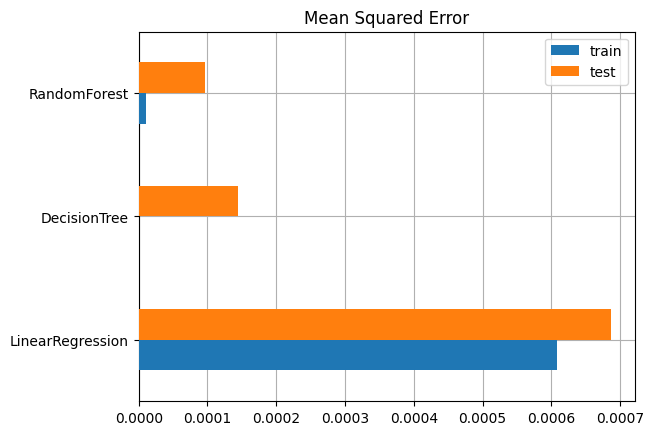

In [24]:
# Visualisasi plot metrik dengan bar chart
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
ax.set_title('Mean Squared Error')
plt.show()

#### Melakukan pengujian model dengan prediksi class dari data test dan data test yang telah di-encode

In [25]:
# Pengujian model dengan prediksi class dari data test
predict = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(predict).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_DecisionTree,prediksi_RandomForest
599,unacc,2.19,2.0,2.00
932,unacc,1.90,2.0,2.00
628,unacc,1.53,2.0,2.00
1497,acc,1.54,0.0,0.06
1262,unacc,1.48,2.0,2.00


In [26]:
# Pengujian model dengan prediksi class dari data test yang telah di-encode
predict = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test_encoded[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(predict).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_DecisionTree,prediksi_RandomForest
0,2,2.19,2.0,2.00
1,2,1.90,2.0,2.00
2,2,1.53,2.0,2.00
3,0,1.54,0.0,0.06
4,2,1.48,2.0,2.00
